In [1]:
from os.path import join
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from growth.sweep.sweep import Sweep
from clones.visualization.settings import *
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
from clones.annotation.classification import MixtureModelClassifier, KMeansClassifier

In [3]:
data = pd.read_hdf('../../../data/synthetic/annotation_example/difficult.hdf', key='microscopy')
values = data.clonal_marker.values

In [4]:
from clones.spatial.graphs import WeightedGraph
from clones.spatial.sampling import SpatialSampler

In [5]:
graph = WeightedGraph(data, 'clonal_marker')

In [6]:
sampler = SpatialSampler(graph, 'clonal_marker', depth=2)

In [7]:
from clones.annotation.model_selection import BivariateModelSelection, UnivariateModelSelection

In [ ]:
uniselector = UnivariateModelSelection(sampler.sample[:, [0]], sampler.attr, min_num_components=1, max_num_components=10)

In [ ]:
selector = BivariateModelSelection(sampler.sample, sampler.keys, min_num_components=1, max_num_components=10)

In [9]:
uniselector.plot_information_criteria()
selector.plot_information_criteria()

AttributeError: 'BivariateModelSelection' object has no attribute 'plot_information_criteria'

In [ ]:
uniselector.BIC

In [ ]:
selector.BIC

In [28]:
class T(BivariateModelSelection):
    
    @property
    def BIC(self):
        """ BIC scores for each model. """
        return np.array([model.model.BIC for model in self.models])
    
    @property
    def AIC(self):
        """ BIC scores for each model. """
        return np.array([model.model.AIC for model in self.models])
    
    

In [29]:
selector.__class__ = T

NameError: name 'fig' is not defined

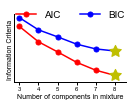

In [30]:
selector.plot_information_criteria(aic=True)

In [23]:
for model in selector.models:
    print(model.model.BIC)

8442.392848741778
8263.901022588527
8107.98890100142
8021.396422240172
7963.909366688875
7919.114497173072


In [17]:
model.model.components

In [7]:
classifier = sampler.train_classifier(3, 3)

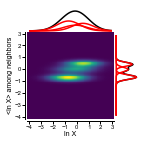

In [8]:
_ = classifier.model.visualize()

In [9]:
marginal = classifier.model[0]

In [10]:
(graph.df.true_dosage.values == classifier(graph.df)).sum() / len(graph.df)

0.8394194756554307

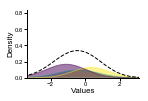

In [16]:
classifier.plot_pdfs()

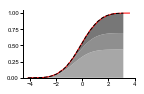

In [12]:
classifier.plot_cdfs()

In [11]:
classifier.model.BIC

9154.385633564536

In [ ]:
graph.

In [4]:
classifier = MixtureModelClassifier(values, num_components=3, classify_on='clonal_marker')

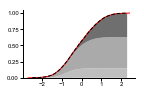

In [5]:
classifier.plot_cdfs()

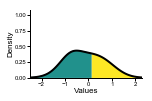

In [6]:
classifier.plot_pdf()

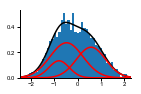

In [7]:
fig, ax = plt.subplots(figsize=(2, 1.25))
classifier.model.plot(ax=ax)
classifier.model.plot_data(ax=ax)

In [4]:
from clones.spatial.graphs import *

ImportError: cannot import name 'Neighbors'

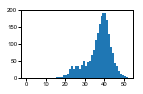

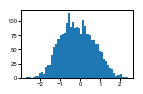

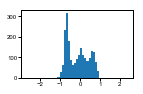

In [20]:
fig, ax = plt.subplots(figsize=(2, 1.25))
_ = ax.hist(sizes, bins=np.arange(sizes.max()+1))

bins = np.linspace(values.min(), values.max(), num=50)

fig, ax = plt.subplots(figsize=(2, 1.25))
_ = ax.hist(values, bins=bins)

fig, ax = plt.subplots(figsize=(2, 1.25))
_ = ax.hist(averages, bins=bins)

In [24]:
sample = graph.df[[attr, attr_name]].values

In [30]:
mixture = BivariateMixture.from_logsample(sample, n=3)

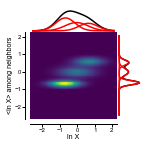

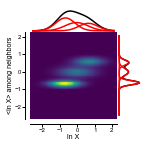

In [31]:
mixture.visualize()

In [15]:
from clones.annotation import BivariateMixture




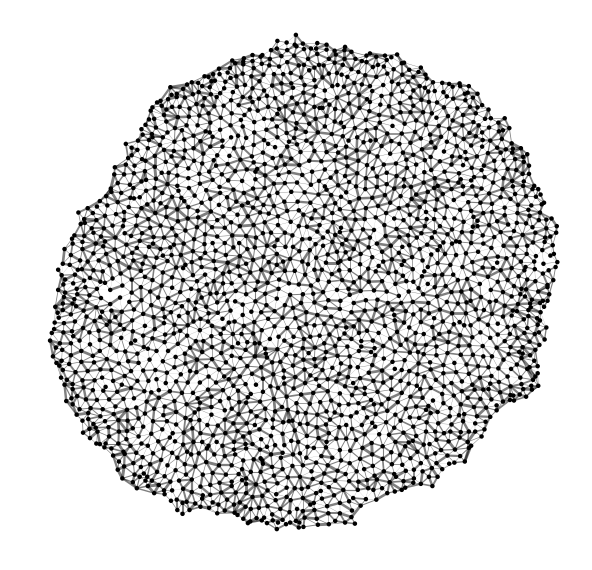

In [13]:
graph.show(node_color='k', edge_color='k')

In [33]:
attr = ('clonal_marker', 'log_clonal_marker')
G = graph.get_networkx(*attr)

In [34]:
import networkx as nx

In [37]:
print(nx.attribute_assortativity_coefficient(G, 'clonal_marker'))
print(nx.attribute_assortativity_coefficient(G, 'log_clonal_marker'))

-0.00048325015864479805
-0.0004832501586447972


In [39]:
x=nx.attribute_mixing_matrix(G, 'clonal_marker')

In [139]:
depth = 1
get_neighbors = lambda src: [e[1] for e in nx.bfs_edges(G, src, depth_limit=depth)]
node_to_neighbors = {src: get_neighbors(src) for src in G.nodes}
node_to_attr = nx.get_node_attributes(G, 'log_clonal_marker')
average_attr = lambda neighbors: np.mean([node_to_attr[node] for node in neighbors])
node_to_neighbor_values = {node: average_attr(neighbors) for node, neighbors in node_to_neighbors.items()}

In [143]:
nx.bfs_edges

6

In [43]:
G.neighbors(0)

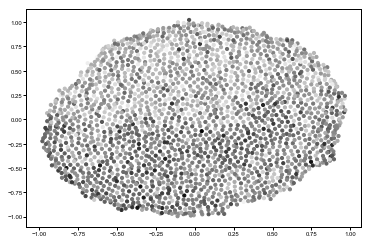

In [52]:
fig, ax = plt.subplots()
ax.scatter(*graph.df[['x','y']].values.T, c=np.log(graph.df.clonal_marker), s=10, cmap=plt.cm.Greys)

In [6]:

(data.true_dosage == classifier(data)).sum() / len(data)

0.3881086142322097

In [23]:
pdf = classifier.model.component_pdfs[2]
x = classifier.model.support

In [27]:
np.trapz(classifier.model.pdf, x=x)

0.9969525965001829

In [31]:
pdf = classifier.model.component_pdfs.sum(axis=0)

In [33]:
opdf = classifier.model.pdf

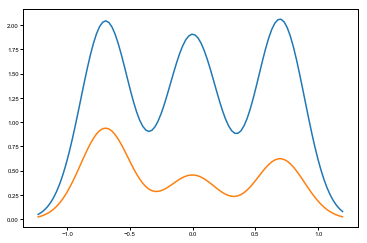

In [35]:
plt.plot(classifier.support, pdf)
plt.plot(classifier.support, opdf)

# Generate synthetic data

Load simulated bleedthrough control experiment and generate synthetic fluorescence data. Synthetic images contain three color channels:
   - BLUE: Nuclear stain
   - RED: Clonal marker
   - GREEN: Control reporter

In [47]:
sweep = Sweep.load('../../../data/synthetic/sweeps/Sweep_181201_191516/')
simulation = sweep[0]

In [48]:
# generate synthetic data

measurement_kwargs = dict(measurement_noise=0.)
microscopy_kwargs = dict(bg_level=0.2, bg_noise=0.3)

microscopy = simulation.generate_microscopy(ambiguity=1., rho=0.0, bleedthrough=0.5, 
                measurement_kwargs=measurement_kwargs, microscopy_kwargs=microscopy_kwargs)

# save synthetic data
#np.save('../../../data/synthetic/annotation_example/image.npy', microscopy.im)
#microscopy.data.to_hdf('../../../data/synthetic/annotation_example/difficult.hdf', key='microscopy')

# load existing synthetic data
#microscopy.im = np.load('../../../data/synthetic/annotation_example/image.npy')
#microscopy.data = pd.read_hdf('../../../data/synthetic/annotation_example/data.hdf', key='microscopy')

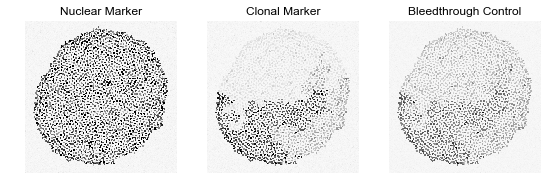

In [5]:
nuclear_marker = microscopy[0]
clonal_marker = microscopy[1]
control_reporter = microscopy[2]

fig = microscopy.render_panels(size=3)

### Annotation

In [6]:
from clones.annotation.mixture import *
from clones.annotation.bayesian import BayesianClassifier
from clones.annotation.model_selection import ModelSelection

NameError: name 'ClassifierVisualization' is not defined

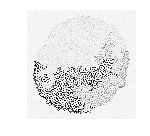

In [16]:
fig = clonal_marker.render(size=2, cmap=plt.cm.Greys)
#savefig(fig, 'clonal_marker')

# Fit mixture model

In [17]:
from clones.annotation.model_selection import ModelSelection

In [12]:
clonal_marker_levels = microscopy.data.clonal_marker.values

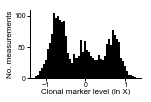

In [19]:
fig, ax = plt.subplots(figsize=(2, 1.25))
_ = ax.hist(np.log(clonal_marker_levels), bins=50, color='k')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylabel('No. measurements')
ax.set_xlabel('Clonal marker level (ln X)')

savefig(fig, 'clonal_marker_histogram')

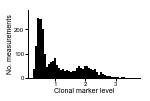

In [16]:
fig, ax = plt.subplots(figsize=(2, 1.25))
_ = ax.hist(clonal_marker_levels, bins=50, color='k')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylabel('No. measurements')
ax.set_xlabel('Clonal marker level')
ax.set_ylim(0, 280)
savefig(fig, 'clonal_marker_histogram_linear')

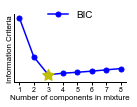

In [20]:
# model selection
selector = ModelSelection(clonal_marker_levels, classify_on='clonal_marker', min_num_components=1, max_num_components=8, crop=False)
fig = selector.plot_information_criteria(aic=False, figsize=(2, 1.25))

savefig(fig, 'model_selection')

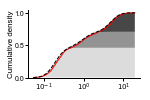

In [21]:
mixture_model = selector.BIC_optimal
fig = selector.BIC_optimal.plot_cdfs(log=True, cmap=plt.cm.Greys, alpha=1., figsize=(2, 1.25))
from matplotlib.ticker import ScalarFormatter
ax = fig.axes[0]
_ = ax.set_xticklabels(['$10^{{{:d}}}$'.format(int(x)) for x in ax.get_xticks()])

savefig(fig, 'model_fit')

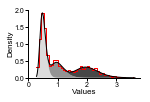

In [22]:
fig = mixture_model.stacked_pdfs(empirical=True, alpha=1., figsize=(2, 1.25))
ax = fig.axes[0]
ax.set_ylim(0, 2.0)

savefig(fig, 'model_fit_pdf')

# Define mapping

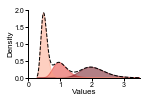

In [30]:
fig = mixture_model.plot_pdfs(empirical=False, alpha=0.5, cmap=plt.cm.Reds, figsize=(2, 1.25))
ax = fig.axes[0]
ax.set_ylim(0, 2.0)
ax.set_xlim(0, 3.5)

savefig(fig, 'pdf_mapping')

# Simple classifier

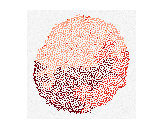

In [42]:
microscopy.data['simple'] = mixture_model(microscopy.data)

fig, ax = plt.subplots(figsize=figsize)
clonal_marker.render(ax=ax, cmap=plt.cm.Greys)
microscopy.render_mask('simple', cmap=plt.cm.Reds, vmin=-1, vmax=2, ax=ax)

savefig(fig, 'simple_classification')

# Annotation algorithm

In [17]:
# construct graph
from clones.spatial.graphs import WeightedGraph
graph = WeightedGraph(microscopy.data, weighted_by='clonal_marker', logratio=True)

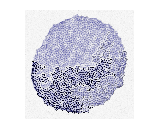

In [20]:
# create axis and add image
fig, ax = plt.subplots(figsize=figsize)
_ = clonal_marker.render(ax=ax, cmap=plt.cm.Greys)

# add graph
graph_kw = dict(node_size=0., node_color='navy', node_alpha=0., 
                edge_color='navy', lw=0.5, edge_alpha=0.5,
                colorby=None)

graph.show(ax=ax, **graph_kw)

savefig(fig, 'graph')

# Community annotation

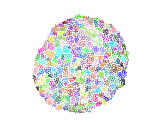

In [38]:
graph.find_communities()

# create axis and add image
fig, ax = plt.subplots(figsize=figsize)
#_ = clonal_marker.render(ax=ax, cmap='r')
clonal_marker.render_blank(ax=ax)

# add graph
graph_kw = dict(node_size=1., node_alpha=1.,
                lw=0.5, edge_alpha=1.)

graph.show(ax=ax, colorby='community', disconnect=True, **graph_kw)

savefig(fig, 'communities')

In [43]:
from clones.annotation.community import InfomapLabeler, KatzLabeler

# apply alternate labels
klabeler = KatzLabeler(graph, mixture_model, label='katz')
klabeler(microscopy.data)
ilabeler = InfomapLabeler(graph, mixture_model, label='infomap')
ilabeler(microscopy.data)

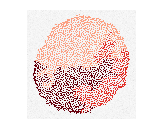

In [44]:
fig, ax = plt.subplots(figsize=figsize)
clonal_marker.render(ax=ax, cmap=plt.cm.Greys)
microscopy.render_mask('katz', cmap=plt.cm.Reds, vmin=-1, vmax=2, ax=ax)
savefig(fig, 'katz_labeled')

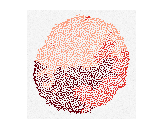

In [45]:
fig, ax = plt.subplots(figsize=figsize)
clonal_marker.render(ax=ax, cmap=plt.cm.Greys)
microscopy.render_mask('infomap', cmap=plt.cm.Reds, vmin=-1, vmax=2, ax=ax)
savefig(fig, 'infomap_labeled')

### Annotation accuracy scoring

In [46]:
from clones.validation.scoring import Scoring
kscore = Scoring(microscopy.data.true_dosage, microscopy.data.katz)
iscore = Scoring(microscopy.data.true_dosage, microscopy.data.infomap)
sscore = Scoring(microscopy.data.true_dosage, microscopy.data.simple)

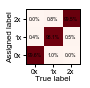

In [47]:
kscore.plot_matrix(text='rates', figsize=(1,1), fontsize=5)
savefig(kscore.matrix.fig, 'scores_katz')

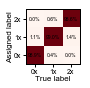

In [48]:
iscore.plot_matrix(text='rates', figsize=(1,1), fontsize=5)
savefig(iscore.matrix.fig, 'scores_imap')

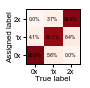

In [49]:
sscore.plot_matrix(text='rates', figsize=(1,1), fontsize=5)
savefig(sscore.matrix.fig, 'scores_simple')